In [6]:


#import tensorflow as tf
import numpy as np
import os
import json
import math
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

json_data={}
with open(os.path.join('en_medical_dialog.json'), 'r') as file:
                data = json.load(file)
                #json_data['data'] = data
                #print(data)

data = data[:10000]
# Sample data
doctor_sentences_train = []
patient_sentences_train = []
doctor_yAxis = []
patient_yAxis = []

doctor_sentences_test = []
patient_sentences_test = []
doctor_yAxis_test = []
patient_yAxis_test = []


# Split data into training and testing sets

trainingData = data[0: math.floor(len(data)*0.8)]
testingData = data[math.floor(len(data)*0.8)+1:len(data)-1]
print(testingData[-1])

for i in trainingData:
  doctor_sentences_train.append(i['Doctor'])
  doctor_yAxis.append(1)
  patient_sentences_train.append(i['Patient'])
  patient_yAxis.append(0)

for i in testingData:
  doctor_sentences_test.append(i['Doctor'])
  doctor_yAxis_test.append(1)
  patient_sentences_test.append(i['Patient'])
  patient_yAxis_test.append(0)


testDataSet = doctor_sentences_test + patient_sentences_test

print(len(doctor_sentences_train))
print(len(patient_sentences_train))

# Labels (1 for doctor, 0 for patient)
labels = doctor_yAxis + patient_yAxis

labelsTest = doctor_yAxis_test + patient_yAxis_test


print(len(labels))


# Combine sentences and labels
all_sentences = doctor_sentences_train + patient_sentences_train
all_labels = np.array(labels)

# Tokenization
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(all_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(all_sentences)
padded_sequences = pad_sequences(sequences, maxlen=50, truncating='post', padding='post')

# Model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 16, input_length=50))
model.add(LSTM(60, dropout=0.2))
model.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(padded_sequences, all_labels, epochs=1, validation_split=0.4)

# Test with a new sentence

new_sentence = testDataSet #["Well! I see the temperature is high but lets observe for 2 more days. I will prescribe papasitomal for now, "]
new_sequence = tokenizer.texts_to_sequences(new_sentence)
new_padded_sequence = pad_sequences(new_sequence, maxlen=50, truncating='post', padding='post')
prediction = model.predict(new_padded_sequence)

test_sequences = tokenizer.texts_to_sequences(testDataSet)
padded_test_sequences = pad_sequences(test_sequences, maxlen=50, truncating='post', padding='post')
# test_labels_onehot = label_encoder.fit_transform(y_test)
loss, accuracy = model.evaluate(padded_test_sequences, np.array(labelsTest))

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


{'id': 9998, 'Description': 'Q. Does ductal hyperplasia indicates cancer?', 'Doctor': "Hello. I have gone through the reports you have provided and the limited clinical history in your case. As I gather from it, let me summarise the case that I understood. Do your age and date of reports has been crop, it appears to me that you undergo an annual mammogram and before two years in a memo from the shelter of defending with high BI-RADS, and you have undergone a biopsy for the same which candidate for any malignancy. There are no additional details about your family history regarding any breast or ovarian cancers. Hence I am taking it as negative.  If my understanding of the case is correct, I will agree with your doctor's plan if there is a positive family history, then you make it I am right breast about the clarity of annual mammogram. If you have any family history of any tumors in the family, I suggest you, please update me so that we can calculate your lifetime risk.   ", 'Patient': 

In [9]:
history.history

{'loss': [6.969058513641357],
 'accuracy': [0.90625],
 'val_loss': [0.5636719465255737],
 'val_accuracy': [0.9778125286102295]}

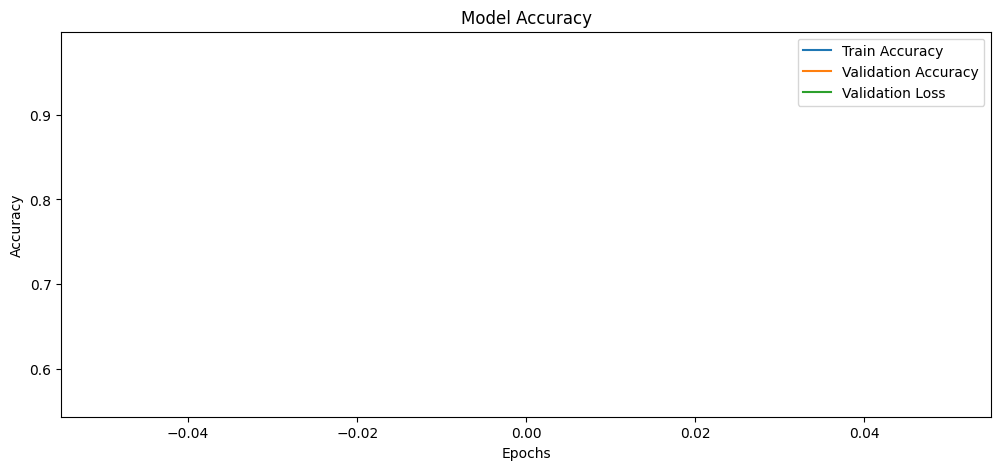

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

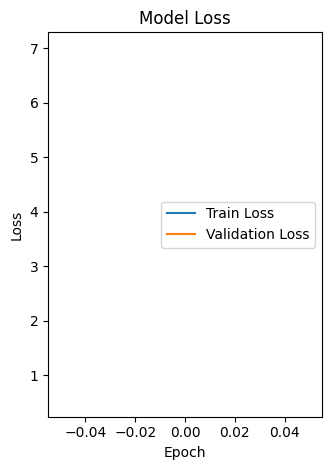

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()